In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM , Dense, Dropout, BatchNormalization

In [155]:
text_df = pd.read_csv('./Data/text_train.csv', header=None)
# text_df = pd.read_csv('./Data/text_train.csv')
text_df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [156]:
text_df = text_df.drop([0,1], axis=1)
text_df.head()

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [157]:
text_df = text_df.rename(columns={2 : 'label', 3: 'text'})
text_df.head()

,label,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [149]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       74682 non-null  object
 1   3       73996 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [159]:
text_df.isnull().sum()

label    0
text     0
dtype: int64

In [158]:
text_df = text_df.dropna()

In [152]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       73996 non-null  object
 1   3       73996 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [160]:
text_df['text'] = text_df['text'].str.replace('[^a-zA-Z ]','', regex=True)
text_df['text'] = text_df['text'].str.lower()
text_df['text'] = text_df['text'].str.strip()
text_df['text'].duplicated().sum()

6997

In [161]:
  text_df.drop_duplicates(subset='text', inplace=True)
# text_df.drop_duplicates(subset='text', inplace=True)

In [162]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66999 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   66999 non-null  object
 1   text    66999 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [163]:
text_df.label.value_counts()

label
Negative      20455
Positive      18215
Neutral       16519
Irrelevant    11810
Name: count, dtype: int64

In [164]:
class_label = { 
               'Negative' : 0 , 
               'Positive' : 1 ,
               'Neutral' : 2 ,
               'Irrelevant' : 3
               }

In [165]:
text_df['label']  = text_df['label'].map(class_label)
text_df['label']


0        1
1        1
2        1
3        1
4        1
        ..
74677    1
74678    1
74679    1
74680    1
74681    1
Name: label, Length: 66999, dtype: int64

In [166]:
text_df['label'].value_counts()

label
0    20455
1    18215
2    16519
3    11810
Name: count, dtype: int64

In [167]:
y = text_df['label']
X = text_df['text']

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y ) 

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(53599,) (13400,) (53599,) (13400,)


In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_v = tfidf.fit_transform(X_train)
X_valid_v = tfidf.transform(X_valid)

In [170]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [171]:
text_lgr = LogisticRegression()
text_lgr.fit(X_train_v, y_train)
text_lgr.score(X_valid_v, y_valid )

c:\Users\Administrator\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7642537313432836

In [74]:
text_sgdc = SGDClassifier()
text_sgdc.fit(X_train_v, y_train)
text_sgdc.score(X_valid_v, y_valid )

0.7152238805970149

In [75]:
text_dtc = DecisionTreeClassifier()
text_dtc.fit(X_train_v, y_train)
text_dtc.score(X_valid_v, y_valid )

0.7237313432835821

In [76]:
text_rfc = RandomForestClassifier()
text_rfc.fit(X_train_v, y_train)
text_rfc.score(X_valid_v, y_valid )

0.908955223880597

In [143]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

token = Tokenizer()
token.fit_on_texts(X_train)

In [78]:
max_words = len(token.word_index)
max_words

35958

In [79]:
X_train_seq = token.texts_to_sequences(X_train)
X_valid_seq = token.texts_to_sequences(X_valid)

In [ ]:
maxlen = (len(i) for i in X_train_seq)

166

In [ ]:
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_valid_pad = pad_sequences(X_valid_seq, maxlen=maxlen)

In [83]:
y.value_counts()

label
0    20455
1    18215
2    16519
3    11810
Name: count, dtype: int64

In [ ]:
model = Sequential()
model.add(Embedding( input_dim= max_words+1, output_dim= 100, input_length = maxlen))
model.add(LSTM(16, return_sequences= True))
model.add(Dropout(0.3))
model.add(LSTM(16, return_sequences= False))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))

model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_pad, y_train , epochs=5, validation_data=(X_valid_pad, y_valid))


Epoch 1/5
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 202s 117ms/step - accuracy: 0.5697 - loss: 1.0184 - val_accuracy: 0.8019 - val_loss: 0.5263
Epoch 2/5
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 192s 114ms/step - accuracy: 0.8822 - loss: 0.3376 - val_accuracy: 0.8434 - val_loss: 0.4571
Epoch 3/5
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 194s 116ms/step - accuracy: 0.9330 - loss: 0.1939 - val_accuracy: 0.8745 - val_loss: 0.3850
Epoch 4/5
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 192s 115ms/step - accuracy: 0.9494 - loss: 0.1546 - val_accuracy: 0.8790 - val_loss: 0.3927
Epoch 5/5
1675/1675 ━━━━━━━━━━━━━━━━━━━━ 189s 113ms/step - accuracy: 0.9606 - loss: 0.1168 - val_accuracy: 0.8813 - val_loss: 0.3908


In [104]:
df2  = pd.read_csv('./Data/text_valid.csv',header=None)
df2.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [105]:
df2 = df2.drop([0,1], axis = 1)
df2 = df2.rename(columns={2:'label', 3:'text'})
df2.head()

,label,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...


In [106]:
df2['text'] = df2['text'].str.replace('[^a-zA-Z ]', '', regex=True)
df2['text'] = df2['text'].str.lower() 
df2['text'] = df2['text'].str.strip() 
df2['text'].duplicated().sum()

3

In [107]:
df2.label.value_counts()

label
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [108]:
class_label = {'Negative':0, 'Positive':1, 'Neutral':2, 'Irrelevant':3}
df2['label'] = df2['label'].map(class_label)
df2.head()

,label,text
0,3,i mentioned on facebook that i was struggling ...
1,2,bbc news amazon boss jeff bezos rejects claim...
2,0,microsoft why do i pay for word when it functi...
3,0,csgo matchmaking is so full of closet hacking ...
4,2,now the president is slapping americans in the...


In [114]:
X_test = df2['text']
y_test = df2['label']

X_test_v = tfidf.transform(X_test)
X_test_seq = token.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq)


In [116]:
rfc_y_pred = text_rfc.predict(X_test_v)
model_y_pred = model.predict(X_test_pad)
model_y_pred = np.argmax(model_y_pred, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


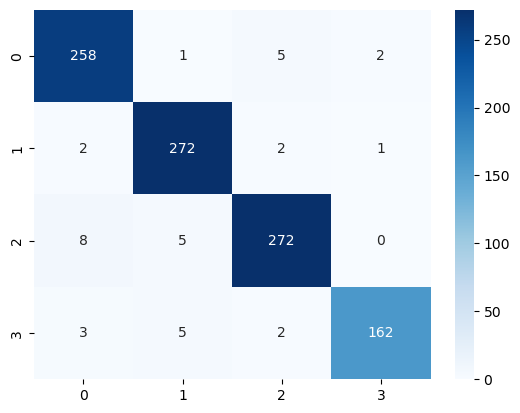

In [119]:
from sklearn.metrics import confusion_matrix
# Text Test 데이터셋에 label이 있어서 예측한 것과 비교용으로 시각화 하였습니다.
# 시험에서는 label이 없기 때문에 확인할 수 없습니다.
# Text RandomForestClassifier 모델
text_cm = confusion_matrix(y_test, rfc_y_pred)
sns.heatmap(data=text_cm, annot=True, fmt='d', cmap='Blues')
plt.show()

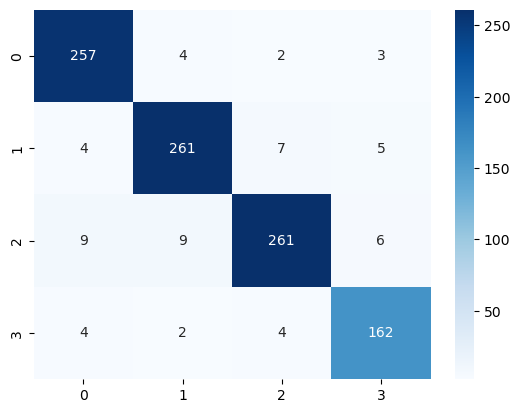

In [120]:
text_cm = confusion_matrix(y_test, model_y_pred)
sns.heatmap(data=text_cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [121]:
df2['pred'] = rfc_y_pred
df2.head()

,label,text,pred
0,3,i mentioned on facebook that i was struggling ...,3
1,2,bbc news amazon boss jeff bezos rejects claim...,2
2,0,microsoft why do i pay for word when it functi...,0
3,0,csgo matchmaking is so full of closet hacking ...,0
4,2,now the president is slapping americans in the...,2


In [122]:
cor = sum(df2['label']==df2['pred'])
total = len(df2)
Acc = cor/total
print(f" Model Accuracy : {Acc:.2f}")

 Model Accuracy : 0.96


In [123]:
label_class = {0:'Negative', 1:'Positive', 2:'Neutral', 3:'Irrelevant'}
df2['label'] = df2['label'].map(label_class)
df2['pred'] = df2['pred'].map(label_class)
df2.head()

,label,text,pred
0,Irrelevant,i mentioned on facebook that i was struggling ...,Irrelevant
1,Neutral,bbc news amazon boss jeff bezos rejects claim...,Neutral
2,Negative,microsoft why do i pay for word when it functi...,Negative
3,Negative,csgo matchmaking is so full of closet hacking ...,Negative
4,Neutral,now the president is slapping americans in the...,Neutral


In [124]:
df2.to_csv('010264659563_2csv', index=False, encoding='utf-8')
df3 = pd.read_csv('01012345678_2.csv')
df3.head()


,label,text,pred
0,Irrelevant,i mentioned on facebook that i was struggling ...,Irrelevant
1,Neutral,bbc news amazon boss jeff bezos rejects claim...,Neutral
2,Negative,microsoft why do i pay for word when it functi...,Negative
3,Negative,csgo matchmaking is so full of closet hacking ...,Negative
4,Neutral,now the president is slapping americans in the...,Neutral


In [132]:
import joblib
joblib.dump(text_rfc,'010264659563_2.joblib')

['010264659563_2.joblib']

In [133]:
text_rfc

RandomForestClassifier()

<Axes: >

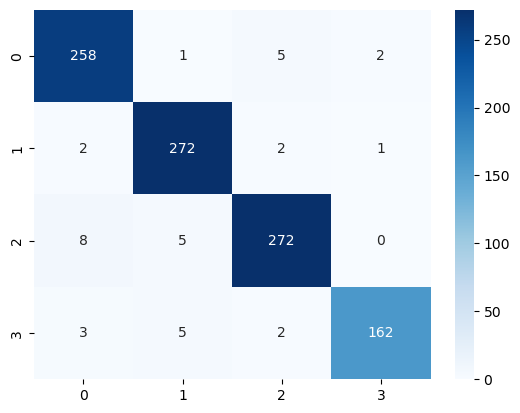

In [142]:
loaded_model = joblib.load('010264659563_2.joblib')
load_y_pred = loaded_model.predict(X_test_v)
cm = confusion_matrix(y_test, load_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

